## Final Project Submission

Please fill out:
* Student name: Jeremy Pagirsky
* Student pace: Part Time
* Scheduled project review date/time: 02/04/21 @ 2:00 PM
* Instructor name: Lindsey Berlin
* Blog post URL: https://jeremy-pagirsky.medium.com/one-way-to-do-a-descriptive-analysis-a-step-by-step-guide-9692c660e639


In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=200
pd.options.display.max_columns=200

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
pwd

'/Users/jerpagirsky/Desktop/Flatiron/CourseMaterials/Phase_2/Phase_2_Project'

In [3]:
cd Data

/Users/jerpagirsky/Desktop/Flatiron/CourseMaterials/Phase_2/Phase_2_Project/data


In [4]:
ls

column_names.md    kc_house_data.csv


In [5]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109,
                98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119,
                98121, 98122, 98124, 98125, 98126, 98127, 98129, 98131, 98133,
                98134, 98136, 98138, 98139, 98141, 98144, 98145, 98146, 98148,
                98154, 98155, 98158, 98160, 98161, 98164, 98165, 98166, 98168,
                98170, 98174, 98175, 98177, 98178, 98181, 98185, 98188, 98190,
                98191, 98194, 98195, 98198, 98199]
seattle_zips

[98101,
 98102,
 98103,
 98104,
 98105,
 98106,
 98107,
 98108,
 98109,
 98111,
 98112,
 98113,
 98114,
 98115,
 98116,
 98117,
 98118,
 98119,
 98121,
 98122,
 98124,
 98125,
 98126,
 98127,
 98129,
 98131,
 98133,
 98134,
 98136,
 98138,
 98139,
 98141,
 98144,
 98145,
 98146,
 98148,
 98154,
 98155,
 98158,
 98160,
 98161,
 98164,
 98165,
 98166,
 98168,
 98170,
 98174,
 98175,
 98177,
 98178,
 98181,
 98185,
 98188,
 98190,
 98191,
 98194,
 98195,
 98198,
 98199]

In [7]:
df['in_seattle'] = np.where(df['zipcode'].isin(seattle_zips), 1, 0)

In [8]:
seattle_df = df[df['in_seattle'] == 1]
seattle_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,1
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1


In [9]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8973 entries, 0 to 21596
Data columns (total 22 columns):
id               8973 non-null int64
date             8973 non-null object
price            8973 non-null float64
bedrooms         8973 non-null int64
bathrooms        8973 non-null float64
sqft_living      8973 non-null int64
sqft_lot         8973 non-null int64
floors           8973 non-null float64
waterfront       7973 non-null float64
view             8946 non-null float64
condition        8973 non-null int64
grade            8973 non-null int64
sqft_above       8973 non-null int64
sqft_basement    8973 non-null object
yr_built         8973 non-null int64
yr_renovated     7327 non-null float64
zipcode          8973 non-null int64
lat              8973 non-null float64
long             8973 non-null float64
sqft_living15    8973 non-null int64
sqft_lot15       8973 non-null int64
in_seattle       8973 non-null int64
dtypes: float64(8), int64(12), object(2)
memory usage: 1.6+ 

In [10]:
seattle_df.drop(columns=['date', 'in_seattle'], inplace = True)

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
seattle_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [12]:
#assuming null values for waterfront mean apt is not by water
seattle_df['waterfront'] = seattle_df['waterfront'].fillna(0)

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
first_model = ['id','price','sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms',
          'floors', 'waterfront', 'condition', 'grade', 'yr_built']

In [14]:
first_model

['id',
 'price',
 'sqft_living',
 'sqft_lot',
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built']

In [15]:
first_model = seattle_df[first_model]

In [16]:
first_model

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,1180,5650,3,1.00,1.0,0.0,3,7,1955
1,6414100192,538000.0,2570,7242,3,2.25,2.0,0.0,3,7,1951
3,2487200875,604000.0,1960,5000,4,3.00,1.0,0.0,5,7,1965
7,2008000270,291850.0,1060,9711,3,1.50,1.0,0.0,3,7,1963
8,2414600126,229500.0,1780,7470,3,1.00,1.0,0.0,3,7,1960
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,3,2.50,2.0,0.0,3,8,2008
21592,263000018,360000.0,1530,1131,3,2.50,3.0,0.0,3,8,2009
21593,6600060120,400000.0,2310,5813,4,2.50,2.0,0.0,3,8,2014
21594,1523300141,402101.0,1020,1350,2,0.75,2.0,0.0,3,7,2009


In [17]:
first_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8973 entries, 0 to 21596
Data columns (total 11 columns):
id             8973 non-null int64
price          8973 non-null float64
sqft_living    8973 non-null int64
sqft_lot       8973 non-null int64
bedrooms       8973 non-null int64
bathrooms      8973 non-null float64
floors         8973 non-null float64
waterfront     8973 non-null float64
condition      8973 non-null int64
grade          8973 non-null int64
yr_built       8973 non-null int64
dtypes: float64(4), int64(7)
memory usage: 841.2 KB


In [18]:
#check for duplicates
first_model[first_model['id'].duplicated()].sort_values(by='id')

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built
12406,123039336,244900.0,620,8261,1,1.00,1.0,0.0,3,5,1939
14842,324000530,459000.0,1320,5000,3,1.00,1.5,0.0,3,7,1912
17368,641900050,499950.0,2160,8817,4,2.25,1.0,0.0,3,7,1965
3782,723049156,284700.0,1700,8645,3,1.00,1.0,0.0,3,6,1955
824,726049190,431000.0,1810,7200,3,1.00,1.0,0.0,4,7,1954
17590,795000620,157000.0,1080,6250,3,1.00,1.0,0.0,2,5,1950
17589,795000620,124000.0,1080,6250,3,1.00,1.0,0.0,2,5,1950
13680,937000330,246500.0,1170,11530,3,1.50,1.0,0.0,3,7,1960
12423,1217000340,340000.0,1840,8100,3,1.00,1.0,0.0,4,7,1953
9866,1219000473,371000.0,1570,15330,3,1.75,1.0,0.0,3,7,1956


In [19]:
first_model.drop([17590], inplace=True)

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
first_model

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,1180,5650,3,1.00,1.0,0.0,3,7,1955
1,6414100192,538000.0,2570,7242,3,2.25,2.0,0.0,3,7,1951
3,2487200875,604000.0,1960,5000,4,3.00,1.0,0.0,5,7,1965
7,2008000270,291850.0,1060,9711,3,1.50,1.0,0.0,3,7,1963
8,2414600126,229500.0,1780,7470,3,1.00,1.0,0.0,3,7,1960
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,3,2.50,2.0,0.0,3,8,2008
21592,263000018,360000.0,1530,1131,3,2.50,3.0,0.0,3,8,2009
21593,6600060120,400000.0,2310,5813,4,2.50,2.0,0.0,3,8,2014
21594,1523300141,402101.0,1020,1350,2,0.75,2.0,0.0,3,7,2009


In [21]:
first_model['bedrooms'].value_counts()

3     3969
4     2115
2     2017
5      554
1      143
6      136
7       21
8        8
9        6
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [22]:
first_model = first_model[first_model['bedrooms'] < 10]

In [23]:
first_model['bedrooms'].value_counts()

3    3969
4    2115
2    2017
5     554
1     143
6     136
7      21
8       8
9       6
Name: bedrooms, dtype: int64

In [24]:
first_model['bathrooms'].value_counts()

1.00    2580
1.75    1342
2.50    1183
2.00     966
1.50     827
2.25     637
2.75     360
3.00     355
3.50     253
3.25     250
3.75      59
4.00      40
0.75      37
4.50      33
4.25      21
4.75       7
1.25       7
0.50       3
5.00       2
5.25       1
5.75       1
6.25       1
6.75       1
5.50       1
7.50       1
8.00       1
Name: bathrooms, dtype: int64

In [25]:
first_model['floors'].value_counts()

1.0    4754
2.0    2137
1.5    1409
3.0     560
2.5     102
3.5       7
Name: floors, dtype: int64

In [26]:
first_model['grade'].value_counts()

7     4281
8     2273
6     1338
9      672
10     217
5      101
11      60
12      13
4        8
13       6
Name: grade, dtype: int64

In [27]:
first_model['condition'].value_counts()

3    5750
4    2151
5     957
2      92
1      19
Name: condition, dtype: int64

In [28]:
first_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 21596
Data columns (total 11 columns):
id             8969 non-null int64
price          8969 non-null float64
sqft_living    8969 non-null int64
sqft_lot       8969 non-null int64
bedrooms       8969 non-null int64
bathrooms      8969 non-null float64
floors         8969 non-null float64
waterfront     8969 non-null float64
condition      8969 non-null int64
grade          8969 non-null int64
yr_built       8969 non-null int64
dtypes: float64(4), int64(7)
memory usage: 840.8 KB


In [29]:
first_model['yr_built']

0        1955
1        1951
3        1965
7        1963
8        1960
         ... 
21591    2008
21592    2009
21593    2014
21594    2009
21596    2008
Name: yr_built, Length: 8969, dtype: int64

In [30]:
#convert yr_built into age in years (2020)
age = []
for x in first_model['yr_built']:
    age.append(2020 - x)

In [31]:
first_model['age_(yr)'] = pd.DataFrame(age, index=first_model.index)

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
first_model

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,age_(yr)
0,7129300520,221900.0,1180,5650,3,1.00,1.0,0.0,3,7,1955,65
1,6414100192,538000.0,2570,7242,3,2.25,2.0,0.0,3,7,1951,69
3,2487200875,604000.0,1960,5000,4,3.00,1.0,0.0,5,7,1965,55
7,2008000270,291850.0,1060,9711,3,1.50,1.0,0.0,3,7,1963,57
8,2414600126,229500.0,1780,7470,3,1.00,1.0,0.0,3,7,1960,60
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,3,2.50,2.0,0.0,3,8,2008,12
21592,263000018,360000.0,1530,1131,3,2.50,3.0,0.0,3,8,2009,11
21593,6600060120,400000.0,2310,5813,4,2.50,2.0,0.0,3,8,2014,6
21594,1523300141,402101.0,1020,1350,2,0.75,2.0,0.0,3,7,2009,11


In [33]:
first_model.drop(columns='yr_built', inplace=True)

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
first_model.head()

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,condition,grade,age_(yr)
0,7129300520,221900.0,1180,5650,3,1.00,1.0,0.0,3,7,65
1,6414100192,538000.0,2570,7242,3,2.25,2.0,0.0,3,7,69
3,2487200875,604000.0,1960,5000,4,3.00,1.0,0.0,5,7,55
7,2008000270,291850.0,1060,9711,3,1.50,1.0,0.0,3,7,57
8,2414600126,229500.0,1780,7470,3,1.00,1.0,0.0,3,7,60


In [35]:
first_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 21596
Data columns (total 11 columns):
id             8969 non-null int64
price          8969 non-null float64
sqft_living    8969 non-null int64
sqft_lot       8969 non-null int64
bedrooms       8969 non-null int64
bathrooms      8969 non-null float64
floors         8969 non-null float64
waterfront     8969 non-null float64
condition      8969 non-null int64
grade          8969 non-null int64
age_(yr)       8969 non-null int64
dtypes: float64(4), int64(7)
memory usage: 840.8 KB


In [36]:
X_cols = [c for c in first_model.columns.to_list() if c not in ['id','price']]

In [37]:
X_cols

['sqft_living',
 'sqft_lot',
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'age_(yr)']

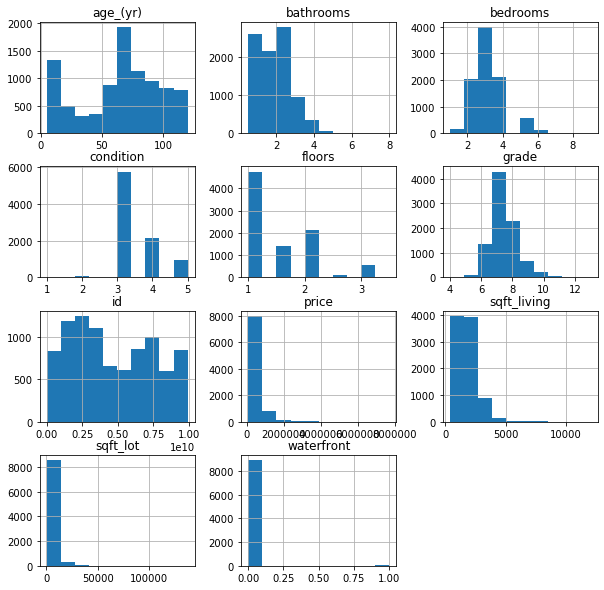

In [38]:
#check skewness of data
first_model.hist(figsize  = [10, 10]);

In [39]:
first_model.sort_values(by='sqft_living', ascending=False)

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,condition,grade,age_(yr)
7245,6762700020,7700000.0,12050,27600,6,8.00,2.5,0.0,4,13,110
14542,2303900035,2890000.0,8670,64033,5,6.25,2.0,0.0,3,13,55
13398,2426039123,2420000.0,7880,24250,5,4.75,2.0,0.0,3,13,24
18462,1346300150,3300000.0,7710,11750,8,4.00,3.5,0.0,5,12,116
4020,9175600025,800000.0,7480,41664,7,6.75,2.0,0.0,3,11,67
...,...,...,...,...,...,...,...,...,...,...,...
14452,7549801385,280000.0,420,6720,1,0.75,1.0,0.0,3,5,98
8614,6303400395,325000.0,410,8636,1,0.75,1.0,0.0,2,4,67
21316,9266700190,245000.0,390,2000,1,1.00,1.0,0.0,4,6,100
860,1723049033,245000.0,380,15000,1,0.75,1.0,0.0,3,5,57


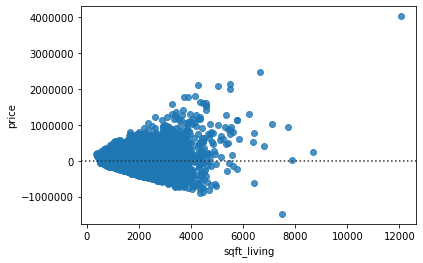

In [40]:
sns.residplot('sqft_living', 'price', data=first_model)

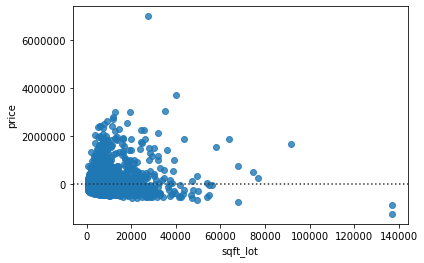

In [41]:
sns.residplot('sqft_lot', 'price', data=first_model)

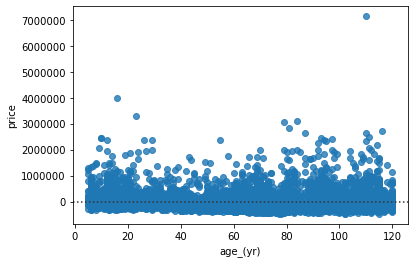

In [42]:
sns.residplot('age_(yr)', 'price', data=first_model)

In [43]:
X_cols_cont = ['sqft_living', 'sqft_lot', 'age_(yr)']

In [44]:
X_cols_cat = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

In [45]:
first_model[X_cols_cont]

,sqft_living,sqft_lot,age_(yr)
0,1180,5650,65
1,2570,7242,69
3,1960,5000,55
7,1060,9711,57
8,1780,7470,60
...,...,...,...
21591,1310,1294,12
21592,1530,1131,11
21593,2310,5813,6
21594,1020,1350,11


In [46]:
first_model[X_cols_cat]

,bedrooms,bathrooms,floors,waterfront,condition,grade
0,3,1.00,1.0,0.0,3,7
1,3,2.25,2.0,0.0,3,7
3,4,3.00,1.0,0.0,5,7
7,3,1.50,1.0,0.0,3,7
8,3,1.00,1.0,0.0,3,7
...,...,...,...,...,...,...
21591,3,2.50,2.0,0.0,3,8
21592,3,2.50,3.0,0.0,3,8
21593,4,2.50,2.0,0.0,3,8
21594,2,0.75,2.0,0.0,3,7


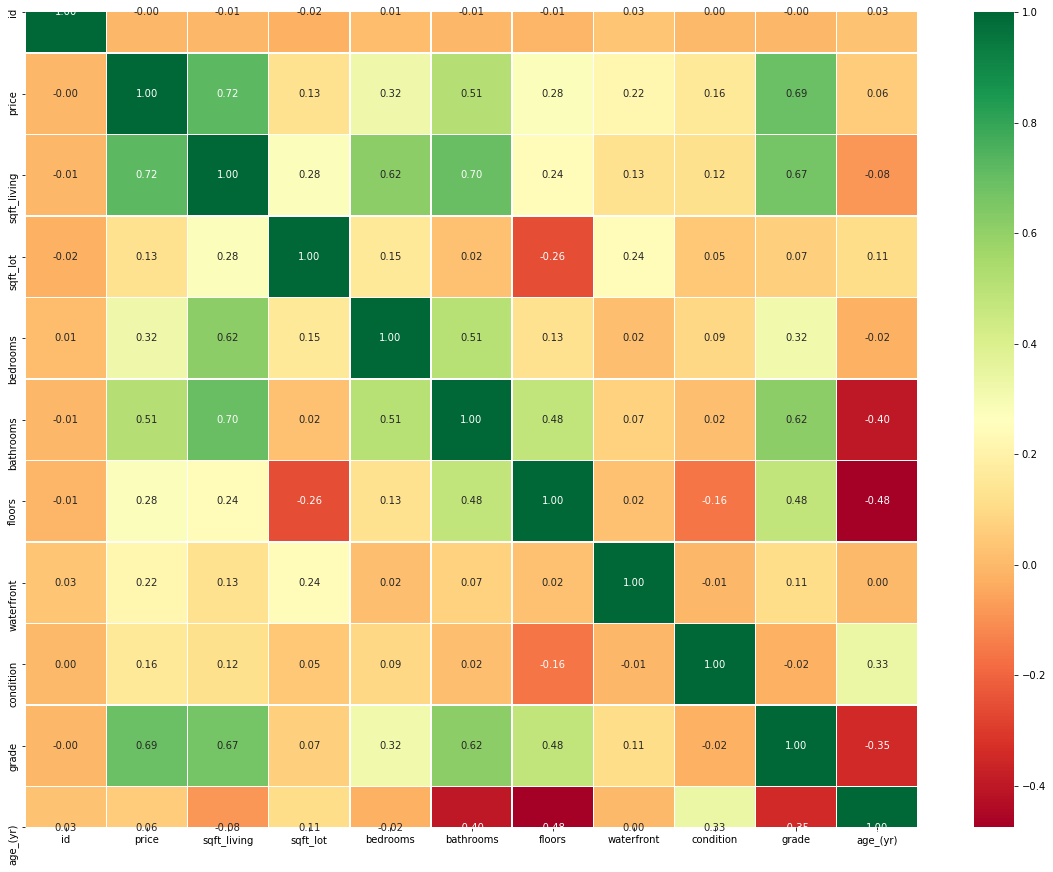

In [47]:
#correlations for all potential predictors
#the warmer colors are misleading (the darkest reds do not show very high correlations)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(first_model.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap='RdYlGn')
plt.show()

In [48]:
#multicollinearity check
pd.DataFrame(first_model.corr().abs().stack().sort_values(0, ascending=False)).head(50)

,,0
age_(yr),age_(yr),1.000000
grade,grade,1.000000
price,price,1.000000
sqft_living,sqft_living,1.000000
sqft_lot,sqft_lot,1.000000
bedrooms,bedrooms,1.000000
floors,floors,1.000000
waterfront,waterfront,1.000000
condition,condition,1.000000
bathrooms,bathrooms,1.000000


In [49]:
# defining a dataframe with just our X variables
X = first_model[X_cols]

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# label the scores with their related columns
vif["features"] = first_model[X_cols].columns

vif

,VIF,features
0,16.842552,sqft_living
1,3.087835,sqft_lot
2,17.972480,bedrooms
3,19.739255,bathrooms
4,12.545517,floors
5,1.085466,waterfront
6,25.408389,condition
7,49.211733,grade
8,7.512355,age_(yr)


In [50]:
first_model.drop(columns=['grade', 'condition'])

,id,price,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,age_(yr)
0,7129300520,221900.0,1180,5650,3,1.00,1.0,0.0,65
1,6414100192,538000.0,2570,7242,3,2.25,2.0,0.0,69
3,2487200875,604000.0,1960,5000,4,3.00,1.0,0.0,55
7,2008000270,291850.0,1060,9711,3,1.50,1.0,0.0,57
8,2414600126,229500.0,1780,7470,3,1.00,1.0,0.0,60
...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,3,2.50,2.0,0.0,12
21592,263000018,360000.0,1530,1131,3,2.50,3.0,0.0,11
21593,6600060120,400000.0,2310,5813,4,2.50,2.0,0.0,6
21594,1523300141,402101.0,1020,1350,2,0.75,2.0,0.0,11


`bathrooms` is highly correlated with `sqft_living`. I'll keep `sqft_living` because it is so strongly correlated with the outcome variable, but I want to see what the first model looks like, even with multicollinearity, to gauge a baseline.

In [51]:
#set desired categorical variables as categories for one hot encoding
first_model['waterfront'] = first_model['waterfront'].astype('category')
first_model['bedrooms'] = first_model['bedrooms'].astype('category')
first_model['bathrooms'] = first_model['bathrooms'].astype('category')
first_model['floors'] = first_model['floors'].astype('category')

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tr

In [52]:
#dummy variables
water_dum_df = pd.get_dummies(first_model['waterfront'], prefix='wtr', drop_first=True)
bed_dum_df = pd.get_dummies(first_model['bedrooms'], prefix='bed', drop_first=True)
bath_dum_df = pd.get_dummies(first_model['bathrooms'], prefix='bath', drop_first=True)
flr_dum_df = pd.get_dummies(first_model['floors'], prefix='flr', drop_first=True)

In [53]:
first_model = pd.concat([first_model, water_dum_df, bed_dum_df, bath_dum_df, flr_dum_df], axis=1)

In [54]:
#categorized 
first_model.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 21596
Data columns (total 50 columns):
id             8969 non-null int64
price          8969 non-null float64
sqft_living    8969 non-null int64
sqft_lot       8969 non-null int64
bedrooms       8969 non-null category
bathrooms      8969 non-null category
floors         8969 non-null category
waterfront     8969 non-null category
condition      8969 non-null int64
grade          8969 non-null int64
age_(yr)       8969 non-null int64
wtr_1.0        8969 non-null uint8
bed_2          8969 non-null uint8
bed_3          8969 non-null uint8
bed_4          8969 non-null uint8
bed_5          8969 non-null uint8
bed_6          8969 non-null uint8
bed_7          8969 non-null uint8
bed_8          8969 non-null uint8
bed_9          8969 non-null uint8
bath_0.75      8969 non-null uint8
bath_1.0       8969 non-null uint8
bath_1.25      8969 non-null uint8
bath_1.5       8969 non-null uint8
bath_1.75      8969 non-null uint8
bat

In [55]:
first_model = first_model.drop(columns=['condition', 'grade', 'waterfront', 'bedrooms', 'bathrooms', 'floors'])

In [56]:
first_model

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75,bath_4.0,bath_4.25,bath_4.5,bath_4.75,bath_5.0,bath_5.25,bath_5.5,bath_5.75,bath_6.25,bath_6.75,bath_7.5,bath_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21592,263000018,360000.0,1530,1131,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,2310,5813,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21594,1523300141,402101.0,1020,1350,11,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Still many outliers, but only doing baseline for now. Will address them later.

In [57]:
first_model.describe()

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75,bath_4.0,bath_4.25,bath_4.5,bath_4.75,bath_5.0,bath_5.25,bath_5.5,bath_5.75,bath_6.25,bath_6.75,bath_7.5,bath_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
count,8.969000e+03,8.969000e+03,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000
mean,4.603744e+09,5.351038e+05,1795.183298,6456.382428,65.033783,0.007359,0.224886,0.442524,0.235812,0.061768,0.015163,0.002341,0.000892,0.000669,0.004125,0.287657,0.000780,0.092206,0.149626,0.107704,0.071022,0.131899,0.040138,0.039581,0.027874,0.028208,0.006578,0.004460,0.002341,0.003679,0.000780,0.000223,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.157097,0.238265,0.011373,0.062437,0.000780
std,2.842757e+09,3.405668e+05,797.976429,5426.294419,32.211442,0.085471,0.417530,0.496713,0.424529,0.240748,0.122209,0.048334,0.029854,0.025857,0.064100,0.452696,0.027927,0.289333,0.356725,0.310024,0.256877,0.338400,0.196294,0.194983,0.164620,0.165577,0.080843,0.066636,0.048334,0.060549,0.027927,0.014932,0.010559,0.010559,0.010559,0.010559,0.010559,0.010559,0.010559,0.363912,0.426046,0.106040,0.241962,0.027927
min,1.200019e+06,7.800000e+04,370.000000,520.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.172000e+09,3.370000e+05,1240.000000,3904.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.022907e+09,4.530000e+05,1640.000000,5589.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.234600e+09,6.300000e+05,2190.000000,7816.000000,92.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,12050.000000,137214.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
scaler = StandardScaler()

In [59]:
X_cols = [c for c in first_model.columns.to_list() if c not in ['price', 'id']]

In [60]:
X_cols

['sqft_living',
 'sqft_lot',
 'age_(yr)',
 'wtr_1.0',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'bath_0.75',
 'bath_1.0',
 'bath_1.25',
 'bath_1.5',
 'bath_1.75',
 'bath_2.0',
 'bath_2.25',
 'bath_2.5',
 'bath_2.75',
 'bath_3.0',
 'bath_3.25',
 'bath_3.5',
 'bath_3.75',
 'bath_4.0',
 'bath_4.25',
 'bath_4.5',
 'bath_4.75',
 'bath_5.0',
 'bath_5.25',
 'bath_5.5',
 'bath_5.75',
 'bath_6.25',
 'bath_6.75',
 'bath_7.5',
 'bath_8.0',
 'flr_1.5',
 'flr_2.0',
 'flr_2.5',
 'flr_3.0',
 'flr_3.5']

In [61]:
X = first_model[X_cols]
y = first_model['price']

In [62]:
#first statsmodel lin reg
model = sm.OLS(y, sm.add_constant(X))

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     395.2
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:27:24   Log-Likelihood:            -1.2226e+05
No. Observations:                8969   AIC:                         2.446e+05
Df Residuals:                    8926   BIC:                         2.449e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.402e+05   1.17e+05     -2.045      0.041   -4.71e+05   -9963.894
sqft_living   301.1983      4.650     64.773      0.000     292.083     310.313
sqft_lot       -5.0370      0.457    -11.026      0.000      -5.933      -4.142
age_(yr)     2483.8983     92.174     26.948      0.000    2303.216    2664.581
wtr_1.0      5.058e+05   2.62e+04     19.318      0.000    4.54e+05    5.57e+05
bed_2       -5557.8332   1.79e+04     -0.311      0.756   -4.06e+04    2.95e+04
bed_3       -6.553e+04    1.8e+04     -3.632      0.000   -1.01e+05   -3.02e+04
bed_4       -1.124e+05   1.88e+04     -5.977      0.000   -1.49e+05   -7.55e+04
bed_5        -1.98e+05   2.06e+04     -9.624      0.000   -2.38e+05   -1.58e+05
bed_6       -2.563e+05   2.61e+04     -9.825      0.000   -3.07e+05   -2.05e+05
bed_7       -3.462e+05   5.07e+04     -6.834      0.000   -4.46e+05   -2.47e+05
bed_8       -2.462e+05   7.75e+04     -3.174      0.002   -3.98e+05   -9.42e+04
bed_9       -5.135e+05   9.41e+04     -5.456      0.000   -6.98e+05   -3.29e+05
bath_0.75    1.056e+05   1.21e+05      0.871      0.384   -1.32e+05    3.43e+05
bath_1.0     1.183e+05   1.17e+05      1.014      0.311   -1.11e+05    3.47e+05
bath_1.25    2.686e+05    1.4e+05      1.926      0.054   -4817.106    5.42e+05
bath_1.5     1.151e+05   1.17e+05      0.984      0.325   -1.14e+05    3.44e+05
bath_1.75    1.059e+05   1.17e+05      0.906      0.365   -1.23e+05    3.35e+05
bath_2.0     9.905e+04   1.17e+05      0.847      0.397    -1.3e+05    3.28e+05
bath_2.25    1.434e+05   1.17e+05      1.223      0.221   -8.63e+04    3.73e+05
bath_2.5     1.309e+05   1.17e+05      1.118      0.264   -9.87e+04    3.61e+05
bath_2.75    1.131e+05   1.17e+05      0.963      0.335   -1.17e+05    3.43e+05
bath_3.0     1.546e+05   1.18e+05      1.315      0.188   -7.58e+04    3.85e+05
bath_3.25    2.684e+05   1.18e+05      2.278      0.023    3.74e+04    4.99e+05
bath_3.5     2.005e+05   1.18e+05      1.700      0.089   -3.07e+04    4.32e+05
bath_3.75    3.197e+05    1.2e+05      2.660      0.008    8.41e+04    5.55e+05
bath_4.0     3.357e+05   1.22e+05      2.759      0.006    9.72e+04    5.74e+05
bath_4.25    6.383e+05   1.26e+05      5.082      0.000    3.92e+05    8.84e+05
bath_4.5     2.662e+05   1.23e+05      2.164      0.031     2.5e+04    5.07e+05
bath_4.75    1.121e+06   1.41e+05      7.959      0.000    8.45e+05     1.4e+06
bath_5.0     5.943e+05   1.89e+05      3.139      0.002    2.23e+05    9.65e+05
bath_5.25   -1.575e+05   2.34e+05     -0.672      0.501   -6.17e+05    3.02e+05
bath_5.5     2.483e+06   2.36e+05     10.530      0.000    2.02e+06    2.95e+06
bath_5.75   -2.397e+05   2.38e+05     -1.006      0.314   -7.07e+05    2.27e+05
bath_6.25    7.913e+05   2.36e+05      3.350      0.001    3.28e+05    1.25e+06
bath_6.75   -9.345e+05   2.39e+05     -3.90

An extraordinarily high JB score. I intentionally hadn't transformed my continuous predictors for the BL model, so this is expected.

In [64]:
lr = LinearRegression()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
len(X_test) + len(X_train) == len(X)

True

In [67]:
X_train.shape

(6726, 42)

In [68]:
X_test.shape

(2243, 42)

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [72]:
print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred, squared=False)}")

Training Scores:
R2: 0.6352902273288281
Mean Absolute Error: 138365.524191816
---
Testing Scores:
R2: 0.618148360650771
Mean Absolute Error: 139784.83176864273
Root Mean Squared Error V1: 219265.41113942527
Root Mean Squared Error V2: 219265.41113942527


Overfit and both MAE and RMSE look quite high. Let's look at what we can do to fix this.

In [73]:
X = first_model[X_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"] = first_model[X_cols].columns
vif

,VIF,features
0,18.364945,sqft_living
1,3.266331,sqft_lot
2,9.804182,age_(yr)
3,1.110212,wtr_1.0
4,15.671187,bed_2
5,31.421000,bed_3
6,18.200251,bed_4
7,5.716448,bed_5
8,2.261644,bed_6
9,1.321535,bed_7


Multicollinearity is high for `age`, `bathrooms`, and `bedrooms`.

In [74]:
pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')[0].sort_values()

bed_4         -4.264832e+04
bed_5         -4.135035e+04
bed_6         -3.154655e+04
bed_3         -2.628413e+04
sqft_lot      -2.568556e+04
bed_7         -1.628107e+04
bath_6.75     -1.076430e+04
bed_9         -8.890838e+03
bed_8         -4.649869e+03
bath_7.5      -3.156191e+03
bath_5.25     -1.469802e+03
bath_5.75     -7.275958e-12
bath_6.25      0.000000e+00
bath_8.0       3.637979e-12
bed_2          2.339270e+03
bath_0.75      7.321439e+03
bath_1.25      8.522661e+03
flr_3.5        8.629289e+03
bath_5.0       1.010400e+04
flr_1.5        1.346713e+04
bath_4.0       1.995600e+04
bath_4.5       2.292964e+04
bath_2.75      2.318118e+04
flr_2.5        2.376262e+04
bath_3.0       3.021320e+04
bath_5.5       3.037571e+04
bath_3.75      3.307524e+04
bath_2.0       3.318878e+04
bath_4.75      3.428475e+04
bath_1.5       3.476187e+04
bath_3.5       3.542982e+04
bath_4.25      3.593531e+04
flr_3.0        3.880676e+04
bath_2.25      3.956411e+04
bath_1.75      4.083249e+04
flr_2.0        4.590

In [75]:
cross_val_score(lr, X_test_scaled, y_test_pred)

array([0.99990068, 0.87416837, 0.99999986, 0.43542458, 0.11936309])

In [76]:
cv_5_results  = np.mean(cross_val_score(lr, X_test_scaled, y_test_pred, cv=5,  scoring='neg_mean_absolute_error'))
cv_10_results = np.mean(cross_val_score(lr, X_test_scaled, y_test_pred, cv=10, scoring='neg_mean_absolute_error'))
cv_20_results = np.mean(cross_val_score(lr, X_test_scaled, y_test_pred, cv=20, scoring='neg_mean_absolute_error'))

In [77]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-4834.433848804241
-4013.3529649550283
-2320.5969464256814


Time to log skewed continuous data. Even though I consider age to be categorical (i.e., discrete years of each house), I'm curious about what age would look like and how it might play out in the model when it is logged.

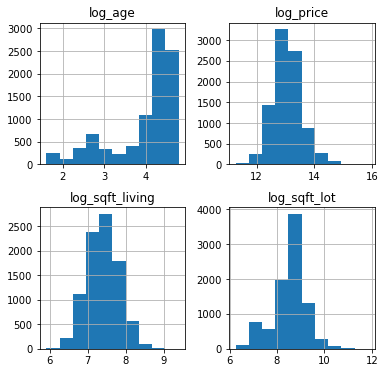

In [78]:
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = (np.log(first_model['sqft_living']))
data_log['log_sqft_lot'] = (np.log(first_model['sqft_lot']))
data_log['log_age'] = (np.log(first_model['age_(yr)']))
data_log['log_price'] = (np.log(first_model['price']))
data_log.hist(figsize  = [6, 6]);

In [79]:
data_log

,log_sqft_living,log_sqft_lot,log_age,log_price
0,7.073270,8.639411,4.174387,12.309982
1,7.851661,8.887653,4.234107,13.195614
3,7.580700,8.517193,4.007333,13.311329
7,6.966024,9.181015,4.043051,12.583995
8,7.484369,8.918650,4.094345,12.343658
...,...,...,...,...
21591,7.177782,7.165493,2.484907,13.071070
21592,7.333023,7.030857,2.397895,12.793859
21593,7.745003,8.667852,1.791759,12.899220
21594,6.927558,7.207860,2.397895,12.904459


In [80]:
X_cols

['sqft_living',
 'sqft_lot',
 'age_(yr)',
 'wtr_1.0',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'bath_0.75',
 'bath_1.0',
 'bath_1.25',
 'bath_1.5',
 'bath_1.75',
 'bath_2.0',
 'bath_2.25',
 'bath_2.5',
 'bath_2.75',
 'bath_3.0',
 'bath_3.25',
 'bath_3.5',
 'bath_3.75',
 'bath_4.0',
 'bath_4.25',
 'bath_4.5',
 'bath_4.75',
 'bath_5.0',
 'bath_5.25',
 'bath_5.5',
 'bath_5.75',
 'bath_6.25',
 'bath_6.75',
 'bath_7.5',
 'bath_8.0',
 'flr_1.5',
 'flr_2.0',
 'flr_2.5',
 'flr_3.0',
 'flr_3.5']

I am dropping all of all of the `bathroom` data because it is multicollinear with `sqft_living`, what may be the strongest predictor for `price`.

In [81]:
second_model = first_model.drop(columns=['bath_0.75','bath_1.0',
 'bath_1.25',
 'bath_1.5',
 'bath_1.75',
 'bath_2.0',
 'bath_2.25',
 'bath_2.5',
 'bath_2.75',
 'bath_3.0',
 'bath_3.25',
 'bath_3.5',
 'bath_3.75',
 'bath_4.0',
 'bath_4.25',
 'bath_4.5',
 'bath_4.75',
 'bath_5.0',
 'bath_5.25',
 'bath_5.5',
 'bath_5.75',
 'bath_6.25',
 'bath_6.75',
 'bath_7.5',
 'bath_8.0'],)

In [82]:
second_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 21596
Data columns (total 19 columns):
id             8969 non-null int64
price          8969 non-null float64
sqft_living    8969 non-null int64
sqft_lot       8969 non-null int64
age_(yr)       8969 non-null int64
wtr_1.0        8969 non-null uint8
bed_2          8969 non-null uint8
bed_3          8969 non-null uint8
bed_4          8969 non-null uint8
bed_5          8969 non-null uint8
bed_6          8969 non-null uint8
bed_7          8969 non-null uint8
bed_8          8969 non-null uint8
bed_9          8969 non-null uint8
flr_1.5        8969 non-null uint8
flr_2.0        8969 non-null uint8
flr_2.5        8969 non-null uint8
flr_3.0        8969 non-null uint8
flr_3.5        8969 non-null uint8
dtypes: float64(1), int64(4), uint8(14)
memory usage: 543.0 KB


In [83]:
log_model = pd.concat([data_log, second_model], axis=1)

In [84]:
log_model

,log_sqft_living,log_sqft_lot,log_age,log_price,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7.073270,8.639411,4.174387,12.309982,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7.851661,8.887653,4.234107,13.195614,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,7.580700,8.517193,4.007333,13.311329,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,6.966024,9.181015,4.043051,12.583995,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,7.484369,8.918650,4.094345,12.343658,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,7.177782,7.165493,2.484907,13.071070,2997800021,475000.0,1310,1294,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,7.333023,7.030857,2.397895,12.793859,263000018,360000.0,1530,1131,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,7.745003,8.667852,1.791759,12.899220,6600060120,400000.0,2310,5813,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,6.927558,7.207860,2.397895,12.904459,1523300141,402101.0,1020,1350,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
log_model = log_model.drop(columns=['price', 'sqft_living', 'sqft_lot', 'age_(yr)'])

In [86]:
log_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 21596
Data columns (total 19 columns):
log_sqft_living    8969 non-null float64
log_sqft_lot       8969 non-null float64
log_age            8969 non-null float64
log_price          8969 non-null float64
id                 8969 non-null int64
wtr_1.0            8969 non-null uint8
bed_2              8969 non-null uint8
bed_3              8969 non-null uint8
bed_4              8969 non-null uint8
bed_5              8969 non-null uint8
bed_6              8969 non-null uint8
bed_7              8969 non-null uint8
bed_8              8969 non-null uint8
bed_9              8969 non-null uint8
flr_1.5            8969 non-null uint8
flr_2.0            8969 non-null uint8
flr_2.5            8969 non-null uint8
flr_3.0            8969 non-null uint8
flr_3.5            8969 non-null uint8
dtypes: float64(4), int64(1), uint8(14)
memory usage: 543.0 KB


In [87]:
X_cols = [c for c in log_model.columns.to_list() if c not in ['log_price', 'id']]

In [88]:
X_cols

['log_sqft_living',
 'log_sqft_lot',
 'log_age',
 'wtr_1.0',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'flr_1.5',
 'flr_2.0',
 'flr_2.5',
 'flr_3.0',
 'flr_3.5']

In [89]:
X = log_model[X_cols]
y = log_model['log_price']

In [90]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     637.5
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:27:25   Log-Likelihood:                -3059.9
No. Observations:                8969   AIC:                             6156.
Df Residuals:                    8951   BIC:                             6284.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.8720      0.095     72.448      0.000       6.686       7.058
log_sqft_living     0.9635      0.013     74.096      0.000       0.938       0.989
log_sqft_lot       -0.1707      0.007    -23.536      0.000      -0.185      -0.156
log_age             0.1641      0.007     24.760      0.000       0.151       0.177
wtr_1.0             0.6444      0.043     14.925      0.000       0.560       0.729
bed_2              -0.0940      0.030     -3.158      0.002      -0.152      -0.036
bed_3              -0.2348      0.030     -7.759      0.000      -0.294      -0.175
bed_4              -0.2765      0.032     -8.679      0.000      -0.339      -0.214
bed_5              -0.3544      0.035    -10.156      0.000      -0.423      -0.286
bed_6              -0.3885      0.044     -8.901      0.000      -0.474      -0.303
bed_7              -0.5341      0.082     -6.553      0.000      -0.694      -0.374
bed_8              -0.3669      0.126     -2.910      0.004      -0.614      -0.120
bed_9              -0.6463      0.144     -4.503      0.000      -0.928      -0.365
flr_1.5             0.0814      0.011      7.279      0.000       0.059       0.103
flr_2.0             0.1706      0.012     14.300      0.000       0.147       0.194
flr_2.5             0.3248      0.035      9.179      0.000       0.255       0.394
flr_3.0             0.2014      0.021      9.787      0.000       0.161       0.242
flr_3.5             0.2387      0.131      1.827      0.068      -0.017       0.495
==============================================================================
Omnibus:                       51.057   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.457
Skew:                          -0.137   Prob(JB):                     3.34e-13
Kurtosis:                       3.280   Cond. No.                         493.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [93]:
print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred, squared=False)}")

Training Scores:
R2: 0.5541718521550874
Mean Absolute Error: 0.2649475472759032
---
Testing Scores:
R2: 0.5269126921411879
Mean Absolute Error: 0.2779771274385227
Root Mean Squared Error V1: 0.350396484098778
Root Mean Squared Error V2: 0.350396484098778


This model is still overfit, but the MAE and RMSE have both dropped significantly, due to logging data. I'll address the outliers in this next model. I'll start with the continuous data and move onto the categorical data.

In [94]:
pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')[0].sort_values()

bed_3             -0.123112
bed_4             -0.120946
log_sqft_lot      -0.119567
bed_5             -0.084263
bed_6             -0.053150
bed_2             -0.046234
bed_7             -0.026860
bed_9             -0.018134
bed_8             -0.011582
flr_3.5            0.006929
flr_1.5            0.027978
flr_2.5            0.037145
flr_3.0            0.048137
wtr_1.0            0.056198
flr_2.0            0.074792
log_age            0.132726
log_sqft_living    0.399656
Name: 0, dtype: float64

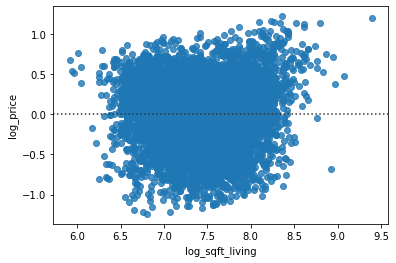

In [95]:
sns.residplot('log_sqft_living','log_price', data=log_model)

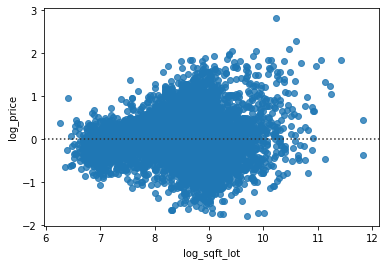

In [96]:
#heteroskedastic
sns.residplot('log_sqft_lot', 'log_price', data=log_model)

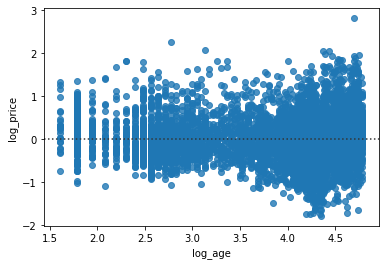

In [97]:
sns.residplot('log_age', 'log_price', data=log_model)

This is interesting. I will use `age` unlogged.

In [98]:
#looking at ranges for continuous data
second_model.describe()

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
count,8.969000e+03,8.969000e+03,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000
mean,4.603744e+09,5.351038e+05,1795.183298,6456.382428,65.033783,0.007359,0.224886,0.442524,0.235812,0.061768,0.015163,0.002341,0.000892,0.000669,0.157097,0.238265,0.011373,0.062437,0.000780
std,2.842757e+09,3.405668e+05,797.976429,5426.294419,32.211442,0.085471,0.417530,0.496713,0.424529,0.240748,0.122209,0.048334,0.029854,0.025857,0.363912,0.426046,0.106040,0.241962,0.027927
min,1.200019e+06,7.800000e+04,370.000000,520.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.172000e+09,3.370000e+05,1240.000000,3904.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.022907e+09,4.530000e+05,1640.000000,5589.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.234600e+09,6.300000e+05,2190.000000,7816.000000,92.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,12050.000000,137214.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
second_model.sort_values(by='sqft_lot', ascending=False).head(200)

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
18049,9537200037,320000.0,1310,137214,94,0,0,0,1,0,0,0,0,0,1,0,0,0,0
12414,7680400140,710000.0,3740,136915,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6396,2624049091,2900000.0,3750,91681,95,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2123,4379600030,1330000.0,6400,76665,54,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11717,2303900045,1580000.0,4570,74487,72,0,0,0,1,0,0,0,0,0,0,1,0,0,0
15152,3304700130,1760000.0,3860,67953,93,0,0,0,1,0,0,0,0,0,0,1,0,0,0
12449,182000350,287500.0,2020,67953,84,0,0,0,0,1,0,0,0,0,1,0,0,0,0
14542,2303900035,2890000.0,8670,64033,55,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17544,7631800015,2510000.0,5480,57990,29,1,0,1,0,0,0,0,0,0,0,1,0,0,0
10615,3585300445,892500.0,2120,56192,61,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [100]:
second_model = second_model[second_model['sqft_lot']<40000]

In [101]:
second_model.sort_values(by='sqft_lot', ascending=False).head(200)

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
6362,4017110020,445800.0,2070,39446,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15498,4030100005,1800000.0,4320,39094,82,1,0,0,0,1,0,0,0,0,0,1,0,0,0
17320,2105200010,515000.0,2030,39049,67,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4422,7781600100,1340000.0,2730,38869,57,0,0,1,0,0,0,0,0,0,1,0,0,0,0
15673,3585900190,825000.0,3400,38400,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3328,2011400405,380000.0,1320,38125,73,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6373,9169600275,280000.0,2280,37500,88,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7865,1454100650,942000.0,3160,37200,81,0,0,0,1,0,0,0,0,0,0,1,0,0,0
15713,6116500290,799950.0,3040,36721,62,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8410,4027700594,520000.0,2310,36665,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [102]:
second_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8940 entries, 0 to 21596
Data columns (total 19 columns):
id             8940 non-null int64
price          8940 non-null float64
sqft_living    8940 non-null int64
sqft_lot       8940 non-null int64
age_(yr)       8940 non-null int64
wtr_1.0        8940 non-null uint8
bed_2          8940 non-null uint8
bed_3          8940 non-null uint8
bed_4          8940 non-null uint8
bed_5          8940 non-null uint8
bed_6          8940 non-null uint8
bed_7          8940 non-null uint8
bed_8          8940 non-null uint8
bed_9          8940 non-null uint8
flr_1.5        8940 non-null uint8
flr_2.0        8940 non-null uint8
flr_2.5        8940 non-null uint8
flr_3.0        8940 non-null uint8
flr_3.5        8940 non-null uint8
dtypes: float64(1), int64(4), uint8(14)
memory usage: 541.3 KB


In [104]:
second_model

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,263000018,360000.0,1530,1131,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,2310,5813,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,1523300141,402101.0,1020,1350,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
second_model.describe()

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
count,8.940000e+03,8.940000e+03,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000
mean,4.604328e+09,5.332523e+05,1789.567002,6284.521812,65.026622,0.006600,0.225503,0.442506,0.235794,0.061298,0.015101,0.002237,0.000895,0.000671,0.156935,0.237808,0.011186,0.062640,0.000783
std,2.842740e+09,3.343952e+05,785.018549,4299.110676,32.240902,0.080974,0.417937,0.496711,0.424518,0.239889,0.121960,0.047248,0.029902,0.025899,0.363760,0.425765,0.105175,0.242328,0.027973
min,1.200019e+06,7.800000e+04,370.000000,520.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.172000e+09,3.370000e+05,1240.000000,3899.750000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.023204e+09,4.523000e+05,1630.000000,5550.500000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.230027e+09,6.300000e+05,2180.000000,7800.000000,92.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,12050.000000,39446.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
second_model.sort_values(by='sqft_living', ascending=False).head(200)

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
7245,6762700020,7700000.0,12050,27600,110,0,0,0,0,0,1,0,0,0,0,0,1,0,0
13398,2426039123,2420000.0,7880,24250,24,0,0,0,0,1,0,0,0,0,0,1,0,0,0
18462,1346300150,3300000.0,7710,11750,116,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7900,1068000375,3200000.0,7100,18200,87,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4807,9831200500,2480000.0,6810,7500,98,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5697,1118002000,2470000.0,6390,13180,80,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7184,7159200005,3200000.0,6210,8856,110,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6189,9185700440,2400000.0,5860,7200,113,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3809,1118000301,2890000.0,5780,7173,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0
15035,8924600020,1540000.0,5770,10050,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0


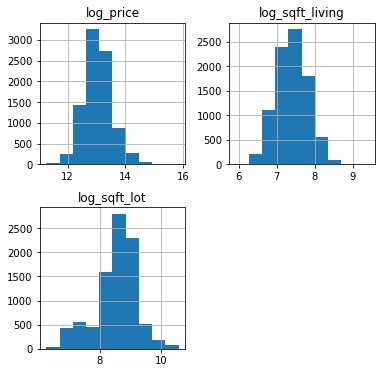

In [108]:
#will not log age this time, as it is fairly normally distributed
log_sec_mod = pd.DataFrame([])
log_sec_mod['log_sqft_living'] = (np.log(second_model['sqft_living']))
log_sec_mod['log_sqft_lot'] = (np.log(second_model['sqft_lot']))
log_sec_mod['log_price'] = (np.log(second_model['price']))
log_sec_mod.hist(figsize  = [6, 6]);

In [109]:
log_sec_mod

,log_sqft_living,log_sqft_lot,log_price
0,7.073270,8.639411,12.309982
1,7.851661,8.887653,13.195614
3,7.580700,8.517193,13.311329
7,6.966024,9.181015,12.583995
8,7.484369,8.918650,12.343658
...,...,...,...
21591,7.177782,7.165493,13.071070
21592,7.333023,7.030857,12.793859
21593,7.745003,8.667852,12.899220
21594,6.927558,7.207860,12.904459


In [110]:
third_model = pd.concat([log_sec_mod, second_model], axis=1)

In [111]:
third_model.drop(columns=['sqft_living', 'sqft_lot', 'price'], inplace=True)

In [112]:
third_model

,log_sqft_living,log_sqft_lot,log_price,id,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7.073270,8.639411,12.309982,7129300520,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7.851661,8.887653,13.195614,6414100192,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,7.580700,8.517193,13.311329,2487200875,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,6.966024,9.181015,12.583995,2008000270,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,7.484369,8.918650,12.343658,2414600126,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,7.177782,7.165493,13.071070,2997800021,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,7.333023,7.030857,12.793859,263000018,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,7.745003,8.667852,12.899220,6600060120,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,6.927558,7.207860,12.904459,1523300141,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [113]:
X_cols = [c for c in third_model.columns.to_list() if c not in ['log_price', 'id']]

In [114]:
X = third_model[X_cols]
y = third_model['log_price']

In [115]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     661.8
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:27:27   Log-Likelihood:                -2910.2
No. Observations:                8940   AIC:                             5856.
Df Residuals:                    8922   BIC:                             5984.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.1271      0.093     76.583      0.000       6.945       7.310
log_sqft_living     0.9596      0.013     74.675      0.000       0.934       0.985
log_sqft_lot       -0.1560      0.007    -21.742      0.000      -0.170      -0.142
age_(yr)            0.0043      0.000     29.829      0.000       0.004       0.005
wtr_1.0             0.6351      0.045     14.211      0.000       0.547       0.723
bed_2              -0.0752      0.029     -2.564      0.010      -0.133      -0.018
bed_3              -0.2013      0.030     -6.745      0.000      -0.260      -0.143
bed_4              -0.2438      0.031     -7.755      0.000      -0.305      -0.182
bed_5              -0.3294      0.034     -9.566      0.000      -0.397      -0.262
bed_6              -0.3525      0.043     -8.177      0.000      -0.437      -0.268
bed_7              -0.4763      0.082     -5.819      0.000      -0.637      -0.316
bed_8              -0.3308      0.124     -2.666      0.008      -0.574      -0.088
bed_9              -0.6290      0.141     -4.451      0.000      -0.906      -0.352
flr_1.5             0.0380      0.011      3.353      0.001       0.016       0.060
flr_2.0             0.1533      0.011     13.458      0.000       0.131       0.176
flr_2.5             0.2702      0.035      7.667      0.000       0.201       0.339
flr_3.0             0.1935      0.020      9.757      0.000       0.155       0.232
flr_3.5             0.2355      0.129      1.831      0.067      -0.017       0.488
==============================================================================
Omnibus:                       72.691   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.217
Skew:                          -0.157   Prob(JB):                     1.90e-19
Kurtosis:                       3.364   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
X = third_model[X_cols]
y = third_model['log_price']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [119]:
print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred, squared=False)}")

Training Scores:
R2: 0.5524042281663143
Mean Absolute Error: 0.26415530344622484
---
Testing Scores:
R2: 0.5721553039801539
Mean Absolute Error: 0.2607774586995727
Root Mean Squared Error V1: 0.33315137523768107
Root Mean Squared Error V2: 0.33315137523768107


In [120]:
pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')[0].sort_values()

bed_4             -0.109205
log_sqft_lot      -0.105867
bed_3             -0.104752
bed_5             -0.081914
bed_6             -0.040392
bed_2             -0.038732
bed_7             -0.025199
bed_9             -0.014591
bed_8             -0.011258
flr_3.5            0.007422
flr_1.5            0.012138
flr_2.5            0.026129
wtr_1.0            0.049636
flr_3.0            0.050071
flr_2.0            0.066229
age_(yr)           0.140154
log_sqft_living    0.394977
Name: 0, dtype: float64

In [121]:
lr.intercept_

13.050609771992562

In [122]:
X_cols

['log_sqft_living',
 'log_sqft_lot',
 'age_(yr)',
 'wtr_1.0',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'flr_1.5',
 'flr_2.0',
 'flr_2.5',
 'flr_3.0',
 'flr_3.5']

In [123]:
X = third_model[X_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"] = third_model[X_cols].columns
vif

,VIF,features
0,347.116928,log_sqft_living
1,261.067948,log_sqft_lot
2,8.692536,age_(yr)
3,1.023321,wtr_1.0
4,14.893459,bed_2
5,31.236849,bed_3
6,18.463875,bed_4
7,5.726885,bed_5
8,2.205715,bed_6
9,1.185151,bed_7


In [143]:
second_model

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,263000018,360000.0,1530,1131,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,2310,5813,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,1523300141,402101.0,1020,1350,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [144]:
second_model.describe()

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
count,8.908000e+03,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
mean,4.603662e+09,5.324436e+05,1788.447351,6239.531994,65.105299,0.006399,0.224966,0.443197,0.235968,0.061181,0.015043,0.002245,0.000898,0.000674,0.157050,0.237090,0.011114,0.062304,0.000786
std,2.842018e+09,3.319338e+05,782.360658,4097.889815,32.209453,0.079740,0.417584,0.496791,0.424626,0.239675,0.121729,0.047333,0.029956,0.025946,0.363868,0.425322,0.104840,0.241720,0.028023
min,1.200019e+06,7.800000e+04,370.000000,704.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.172000e+09,3.370000e+05,1240.000000,3904.750000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.023500e+09,4.520500e+05,1630.000000,5550.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.228502e+09,6.299500e+05,2180.000000,7800.000000,92.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,12050.000000,33826.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
second_model.sort_values(by='sqft_lot', ascending=False).head(200)

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
8492,4019300155,911100.0,3330,33826,96,0,0,0,1,0,0,0,0,0,0,1,0,0,0
15501,3361402066,365000.0,3080,32997,70,0,0,0,1,0,0,0,0,0,1,0,0,0,0
16708,798000630,340000.0,2020,32710,79,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19342,3585300194,1400000.0,4140,32700,47,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14216,1447600410,290000.0,1480,32700,78,0,0,1,0,0,0,0,0,0,0,0,0,0,0
13249,2011400021,392000.0,3740,32481,62,0,0,0,0,1,0,0,0,0,1,0,0,0,0
20748,9536600810,380000.0,1984,32400,58,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9488,3586500770,808000.0,2590,32380,69,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17298,3585901025,1740000.0,4310,32093,38,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3154,1827200265,1900000.0,3690,32044,31,1,1,0,0,0,0,0,0,0,0,1,0,0,0


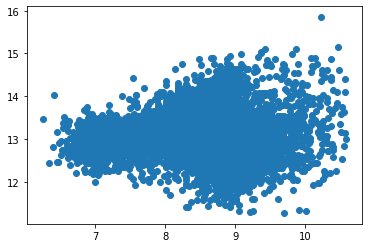

In [146]:
plt.scatter('log_sqft_lot', 'log_price', data=third_model)

In [147]:
8940*.0015

13.41

In [148]:
len(second_model[second_model['sqft_lot']<700])

0

In [149]:
len(second_model[second_model['sqft_lot'] >34000])

0

In [150]:
second_model = second_model[second_model['sqft_lot'] > 700]

In [151]:
second_model = second_model[second_model['sqft_lot'] < 34000]

In [152]:
second_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 21596
Data columns (total 19 columns):
id             8908 non-null int64
price          8908 non-null float64
sqft_living    8908 non-null int64
sqft_lot       8908 non-null int64
age_(yr)       8908 non-null int64
wtr_1.0        8908 non-null uint8
bed_2          8908 non-null uint8
bed_3          8908 non-null uint8
bed_4          8908 non-null uint8
bed_5          8908 non-null uint8
bed_6          8908 non-null uint8
bed_7          8908 non-null uint8
bed_8          8908 non-null uint8
bed_9          8908 non-null uint8
flr_1.5        8908 non-null uint8
flr_2.0        8908 non-null uint8
flr_2.5        8908 non-null uint8
flr_3.0        8908 non-null uint8
flr_3.5        8908 non-null uint8
dtypes: float64(1), int64(4), uint8(14)
memory usage: 539.4 KB


In [153]:
second_model

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,263000018,360000.0,1530,1131,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,2310,5813,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,1523300141,402101.0,1020,1350,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


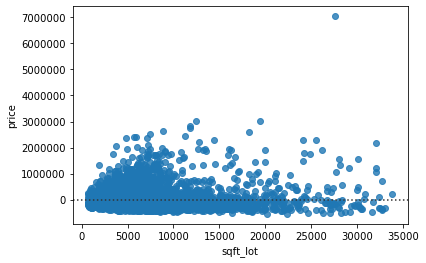

In [154]:
sns.residplot('sqft_lot', 'price', data=second_model)

In [157]:
second_model.sort_values(by='price', ascending=False).head(200)

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
7245,6762700020,7700000.0,12050,27600,110,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6502,4217402115,3650000.0,5480,19401,84,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2862,4114601570,3600000.0,5020,12431,79,1,0,1,0,0,0,0,0,0,0,1,0,0,0
10435,1118000320,3400000.0,4260,11765,81,0,0,0,1,0,0,0,0,0,0,1,0,0,0
18462,1346300150,3300000.0,7710,11750,116,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7184,7159200005,3200000.0,6210,8856,110,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7900,1068000375,3200000.0,7100,18200,87,0,0,0,0,0,1,0,0,0,0,0,1,0,0
15244,1732800780,3070000.0,4150,7500,111,0,0,0,0,1,0,0,0,0,0,0,1,0,0
11963,1118000340,3000000.0,4590,11265,93,0,0,0,0,1,0,0,0,0,0,1,0,0,0
20138,1176001310,2950000.0,4340,5722,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [159]:
second_model = second_model[second_model['price'] < 3000000.0]

In [160]:
second_model.sort_values(by='price').head(200) 

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
15279,40000362,78000.0,780,16344,78,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16184,3028200080,81000.0,730,9975,77,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8267,3883800011,82000.0,860,10426,66,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2139,1623049041,82500.0,520,22334,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0
18453,7999600180,83000.0,900,8580,102,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3763,1523049188,84000.0,700,20130,71,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3106,1721801591,89950.0,570,4080,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17566,1423049019,90000.0,580,7500,77,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7985,2734100835,90000.0,780,4000,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16516,2114700500,90000.0,560,4120,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
second_model = second_model[second_model['price'] > 100000.0]

In [162]:
second_model

,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,1294,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,263000018,360000.0,1530,1131,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,2310,5813,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,1523300141,402101.0,1020,1350,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


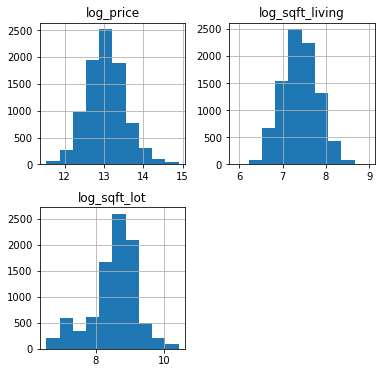

In [163]:
log_sec_mod = pd.DataFrame([])
log_sec_mod['log_sqft_living'] = (np.log(second_model['sqft_living']))
log_sec_mod['log_sqft_lot'] = (np.log(second_model['sqft_lot']))
log_sec_mod['log_price'] = (np.log(second_model['price']))
log_sec_mod.hist(figsize  = [6, 6]);

In [164]:
log_sec_mod

,log_sqft_living,log_sqft_lot,log_price
0,7.073270,8.639411,12.309982
1,7.851661,8.887653,13.195614
3,7.580700,8.517193,13.311329
7,6.966024,9.181015,12.583995
8,7.484369,8.918650,12.343658
...,...,...,...
21591,7.177782,7.165493,13.071070
21592,7.333023,7.030857,12.793859
21593,7.745003,8.667852,12.899220
21594,6.927558,7.207860,12.904459


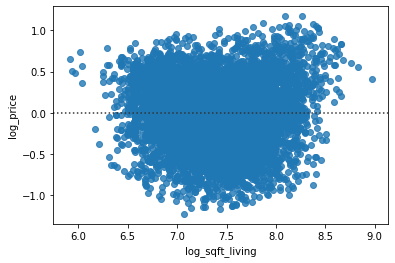

In [165]:
sns.residplot('log_sqft_living', 'log_price', data=log_sec_mod)

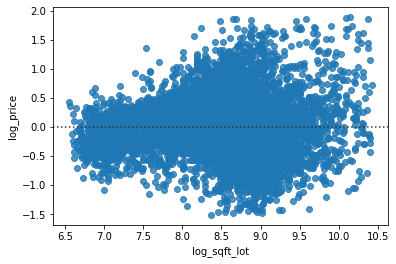

In [166]:
sns.residplot('log_sqft_lot', 'log_price', data=log_sec_mod)

In [167]:
fourth_model = pd.concat([log_sec_mod, second_model], axis=1)

In [169]:
fourth_model.head()

,log_sqft_living,log_sqft_lot,log_price,id,price,sqft_living,sqft_lot,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7.073270,8.639411,12.309982,7129300520,221900.0,1180,5650,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7.851661,8.887653,13.195614,6414100192,538000.0,2570,7242,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,7.580700,8.517193,13.311329,2487200875,604000.0,1960,5000,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,6.966024,9.181015,12.583995,2008000270,291850.0,1060,9711,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,7.484369,8.918650,12.343658,2414600126,229500.0,1780,7470,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
fourth_model.drop(columns=['sqft_living', 'sqft_lot', 'price'], inplace=True)

In [171]:
fourth_model

,log_sqft_living,log_sqft_lot,log_price,id,age_(yr),wtr_1.0,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7.073270,8.639411,12.309982,7129300520,65,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7.851661,8.887653,13.195614,6414100192,69,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,7.580700,8.517193,13.311329,2487200875,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,6.966024,9.181015,12.583995,2008000270,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,7.484369,8.918650,12.343658,2414600126,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,7.177782,7.165493,13.071070,2997800021,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21592,7.333023,7.030857,12.793859,263000018,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21593,7.745003,8.667852,12.899220,6600060120,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,6.927558,7.207860,12.904459,1523300141,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [172]:
X_cols = [c for c in fourth_model.columns.to_list() if c not in ['log_price', 'id']]

In [173]:
X = fourth_model[X_cols]
y = fourth_model['log_price']

In [174]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     637.4
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:34:22   Log-Likelihood:                -2802.9
No. Observations:                8884   AIC:                             5642.
Df Residuals:                    8866   BIC:                             5769.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.2600      0.093     77.711      0.000       7.077       7.443
log_sqft_living     0.9469      0.013     73.879      0.000       0.922       0.972
log_sqft_lot       -0.1591      0.007    -21.973      0.000      -0.173      -0.145
age_(yr)            0.0043      0.000     29.975      0.000       0.004       0.005
wtr_1.0             0.6142      0.046     13.426      0.000       0.525       0.704
bed_2              -0.0861      0.030     -2.915      0.004      -0.144      -0.028
bed_3              -0.2135      0.030     -7.105      0.000      -0.272      -0.155
bed_4              -0.2516      0.032     -7.962      0.000      -0.314      -0.190
bed_5              -0.3389      0.035     -9.806      0.000      -0.407      -0.271
bed_6              -0.3733      0.043     -8.631      0.000      -0.458      -0.289
bed_7              -0.5098      0.083     -6.150      0.000      -0.672      -0.347
bed_8              -0.3851      0.130     -2.970      0.003      -0.639      -0.131
bed_9              -0.6201      0.140     -4.428      0.000      -0.895      -0.346
flr_1.5             0.0368      0.011      3.272      0.001       0.015       0.059
flr_2.0             0.1531      0.011     13.527      0.000       0.131       0.175
flr_2.5             0.2395      0.036      6.715      0.000       0.170       0.309
flr_3.0             0.1874      0.020      9.479      0.000       0.149       0.226
flr_3.5             0.1711      0.136      1.255      0.210      -0.096       0.438
==============================================================================
Omnibus:                       54.636   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.747
Skew:                          -0.138   Prob(JB):                     2.37e-14
Kurtosis:                       3.305   Cond. No.                     3.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
rob_scale = RobustScaler()

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [177]:
X_train_scaled = rob_scale.fit_transform(X_train)
X_test_scaled = rob_scale.fit_transform(X_test)

lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [178]:
print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred, squared=False)}")

Training Scores:
R2: 0.5534638482517715
Mean Absolute Error: 0.26144606126566655
---
Testing Scores:
R2: 0.5367007601525773
Mean Absolute Error: 0.2610704066085159
Root Mean Squared Error V1: 0.33332465946201906
Root Mean Squared Error V2: 0.33332465946201906


In [181]:
X = fourth_model[X_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"] = fourth_model[X_cols].columns
vif

,VIF,features
0,355.366924,log_sqft_living
1,267.175904,log_sqft_lot
2,8.698164,age_(yr)
3,1.021769,wtr_1.0
4,15.208065,bed_2
5,32.176189,bed_3
6,18.986303,bed_4
7,5.839970,bed_5
8,2.202175,bed_6
9,1.179689,bed_7


In [184]:
pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')[0].sort_values()

bed_9             -0.658446
bed_7             -0.560158
bed_8             -0.395774
bed_6             -0.356639
bed_5             -0.345757
bed_4             -0.258356
bed_3             -0.219024
log_sqft_lot      -0.111955
bed_2             -0.089460
flr_1.5            0.045092
flr_2.0            0.148631
flr_3.5            0.170364
flr_3.0            0.182057
age_(yr)           0.210950
flr_2.5            0.217230
log_sqft_living    0.544696
wtr_1.0            0.633726
Name: 0, dtype: float64

In [183]:
lr.intercept_

13.204087769465602

In [186]:
X_cols

['log_sqft_living',
 'log_sqft_lot',
 'age_(yr)',
 'wtr_1.0',
 'bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9',
 'flr_1.5',
 'flr_2.0',
 'flr_2.5',
 'flr_3.0',
 'flr_3.5']

In [189]:
fifth_model = fourth_model.drop(columns=['bed_2',
 'bed_3',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_8',
 'bed_9'])

In [190]:
fifth_model

,log_sqft_living,log_sqft_lot,log_price,id,age_(yr),wtr_1.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,7.073270,8.639411,12.309982,7129300520,65,0,0,0,0,0,0
1,7.851661,8.887653,13.195614,6414100192,69,0,0,1,0,0,0
3,7.580700,8.517193,13.311329,2487200875,55,0,0,0,0,0,0
7,6.966024,9.181015,12.583995,2008000270,57,0,0,0,0,0,0
8,7.484369,8.918650,12.343658,2414600126,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21591,7.177782,7.165493,13.071070,2997800021,12,0,0,1,0,0,0
21592,7.333023,7.030857,12.793859,263000018,11,0,0,0,0,1,0
21593,7.745003,8.667852,12.899220,6600060120,6,0,0,1,0,0,0
21594,6.927558,7.207860,12.904459,1523300141,11,0,0,1,0,0,0


In [208]:
X_cols = [c for c in fifth_model.columns.to_list() if c not in ['id','log_price']]

In [209]:
X = fifth_model[X_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"] = fifth_model[X_cols].columns
vif

,VIF,features
0,276.728222,log_sqft_living
1,259.126519,log_sqft_lot
2,8.438224,age_(yr)
3,1.019787,wtr_1.0
4,1.533141,flr_1.5
5,2.442626,flr_2.0
6,1.077159,flr_2.5
7,1.833059,flr_3.0
8,1.010120,flr_3.5


In [210]:
X = fifth_model[X_cols]
y = fifth_model['log_price']

In [211]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

/Users/jerpagirsky/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1139.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:41:07   Log-Likelihood:                -2939.8
No. Observations:                8884   AIC:                             5900.
Df Residuals:                    8874   BIC:                             5970.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.0064      0.076    105.809      0.000       7.858       8.155
log_sqft_living     0.8273      0.010     79.209      0.000       0.807       0.848
log_sqft_lot       -0.1675      0.007    -22.904      0.000      -0.182      -0.153
age_(yr)            0.0045      0.000     31.135      0.000       0.004       0.005
wtr_1.0             0.6766      0.046     14.622      0.000       0.586       0.767
flr_1.5             0.0074      0.011      0.660      0.510      -0.015       0.029
flr_2.0             0.1566      0.011     13.650      0.000       0.134       0.179
flr_2.5             0.2205      0.036      6.123      0.000       0.150       0.291
flr_3.0             0.1873      0.020      9.351      0.000       0.148       0.227
flr_3.5             0.1896      0.138      1.370      0.171      -0.082       0.461
==============================================================================
Omnibus:                       44.633   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.602
Skew:                          -0.104   Prob(JB):                     2.29e-12
Kurtosis:                       3.318   Cond. No.                     2.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [213]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [214]:
print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error V1: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Root Mean Squared Error V2: {mean_squared_error(y_test, y_test_pred, squared=False)}")

Training Scores:
R2: 0.5401846387208572
Mean Absolute Error: 0.2637032122616362
---
Testing Scores:
R2: 0.522755193801945
Mean Absolute Error: 0.2713239763349816
Root Mean Squared Error V1: 0.3459660027069706
Root Mean Squared Error V2: 0.3459660027069706


In [215]:
pd.DataFrame.from_dict(dict(zip(X.columns, lr.coef_)), orient='index')[0].sort_values()

log_sqft_lot      -0.112368
flr_1.5            0.000148
flr_3.5            0.006162
flr_2.5            0.017924
flr_3.0            0.047421
wtr_1.0            0.054694
flr_2.0            0.062808
age_(yr)           0.149397
log_sqft_living    0.342153
Name: 0, dtype: float64